In [1]:
import pandas as pd
import pandas as ps
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")


In [2]:
# pd.set_option("display.max_rows",None)
# pd.set_option("display.max_columns",None)
df=pd.read_csv(r"H:\Sandeep\DATA SCIENCE\INTERNSHIP_Cognifyz\Dataset .csv")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


# removing special characters

In [3]:
categorical_columns=df.select_dtypes(include='object')
categorical_columns

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
0,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent
1,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent
2,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,Green,Very Good
3,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Sushi",Botswana Pula(P),No,No,No,No,Dark Green,Excellent
4,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Korean",Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,Naml۱ Gurme,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",Turkish,Turkish Lira(TL),No,No,No,No,Green,Very Good
9547,Ceviz A��ac۱,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul","World Cuisine, Patisserie, Cafe",Turkish Lira(TL),No,No,No,No,Green,Very Good
9548,Huqqa,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul","Italian, World Cuisine",Turkish Lira(TL),No,No,No,No,Yellow,Good
9549,A���k Kahve,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",Restaurant Cafe,Turkish Lira(TL),No,No,No,No,Green,Very Good


In [4]:
categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Restaurant Name       9551 non-null   object
 1   City                  9551 non-null   object
 2   Address               9551 non-null   object
 3   Locality              9551 non-null   object
 4   Locality Verbose      9551 non-null   object
 5   Cuisines              9542 non-null   object
 6   Currency              9551 non-null   object
 7   Has Table booking     9551 non-null   object
 8   Has Online delivery   9551 non-null   object
 9   Is delivering now     9551 non-null   object
 10  Switch to order menu  9551 non-null   object
 11  Rating color          9551 non-null   object
 12  Rating text           9551 non-null   object
dtypes: object(13)
memory usage: 970.2+ KB


In [5]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


# Level 1

# Task 1

Task: Data Exploration and Preprocessing

Explore the dataset and identify the number
of rows and columns.

Check for missing values in each column and
handle them accordingly.

Perform data type conversion if necessary.
Analyze the distribution of the target variable
("Aggregate rating") and identify any class
imbalances.

In [6]:
df.shape

(9551, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# missing values or NAN values

In [8]:
df.isnull().any()

Restaurant ID           False
Restaurant Name         False
Country Code            False
City                    False
Address                 False
Locality                False
Locality Verbose        False
Longitude               False
Latitude                False
Cuisines                 True
Average Cost for two    False
Currency                False
Has Table booking       False
Has Online delivery     False
Is delivering now       False
Switch to order menu    False
Price range             False
Aggregate rating        False
Rating color            False
Rating text             False
Votes                   False
dtype: bool

In [9]:
df['Cuisines'].isnull().sum()

9

# Visualizing the missing values

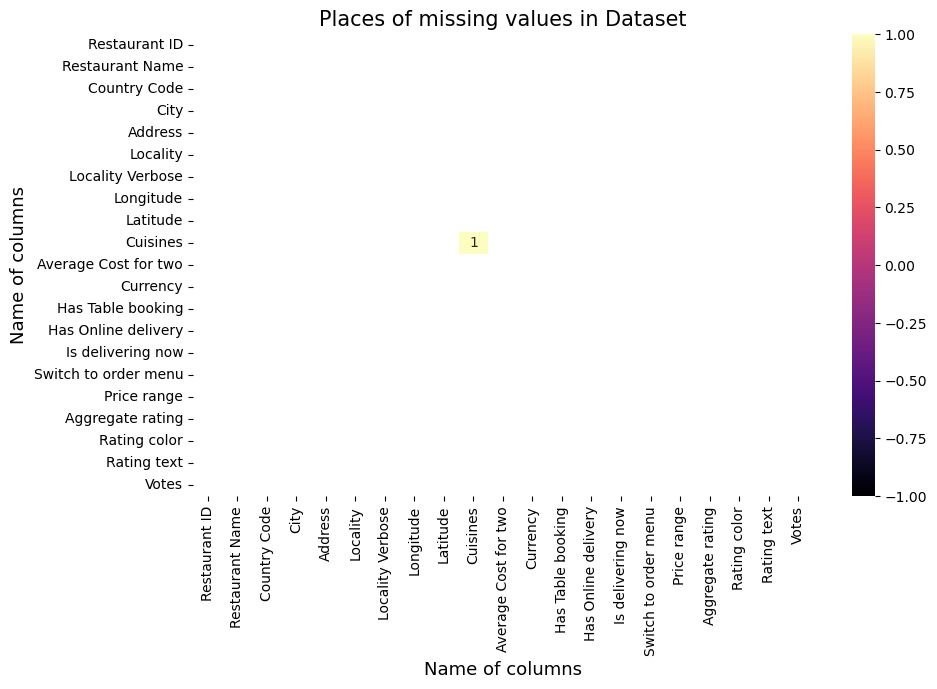

In [10]:
plt.figure(figsize = (10,6))
sns.heatmap(df.isnull().corr(), vmin=-1, annot= True,cmap='magma')
plt.xlabel('Name of columns', fontsize=13)
plt.ylabel('Name of columns', fontsize=13)
plt.title('Places of missing values in Dataset', fontsize=15)
plt.show()

In [11]:
df['Cuisines']

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object

In [12]:
df['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [13]:
df['Cuisines'].value_counts()

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [14]:
df['Cuisines'].mode()[0]

'North Indian'

In [15]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# filling null values with most repeated value in a column

In [16]:
df['Cuisines'].fillna(df['Cuisines'].mode()[0],inplace=True)

In [17]:
df['Cuisines'].isnull().sum()

0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### Remove_special_characters

In [19]:
def remove_special_characters(text):
    text = str(text)
    return re.sub(r'[^\w\s]', '', text)

In [20]:
for col in categorical_columns:
    df[col] = df[col].apply(remove_special_characters)

In [21]:
df['Cuisines']

0            French Japanese Desserts
1                            Japanese
2       Seafood Asian Filipino Indian
3                      Japanese Sushi
4                     Japanese Korean
                    ...              
9546                          Turkish
9547    World Cuisine Patisserie Cafe
9548            Italian World Cuisine
9549                  Restaurant Cafe
9550                             Cafe
Name: Cuisines, Length: 9551, dtype: object

In [22]:
df['Aggregate rating'].value_counts()

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

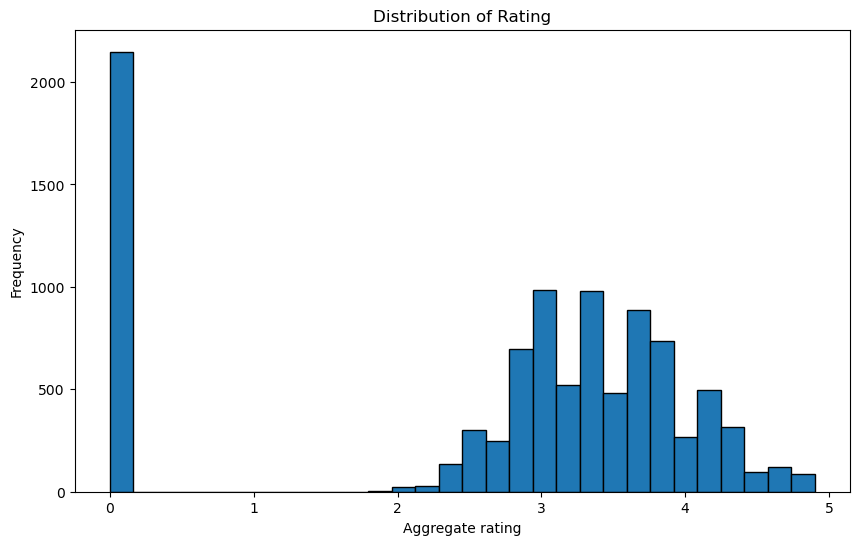

In [23]:
plt.figure(figsize=(10,6))
plt.hist(df['Aggregate rating'],bins=30,edgecolor="k")
plt.title("Distribution of Rating")
plt.xlabel("Aggregate rating")
plt.ylabel("Frequency")
plt.show()

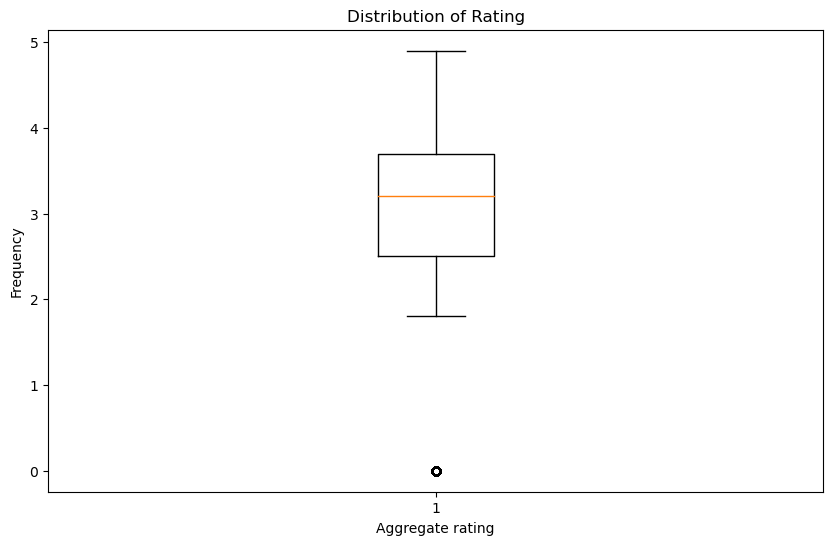

In [24]:
plt.figure(figsize=(10,6))
plt.boxplot(df['Aggregate rating'])
plt.title("Distribution of Rating")
plt.xlabel("Aggregate rating")
plt.ylabel("Frequency")
plt.show()

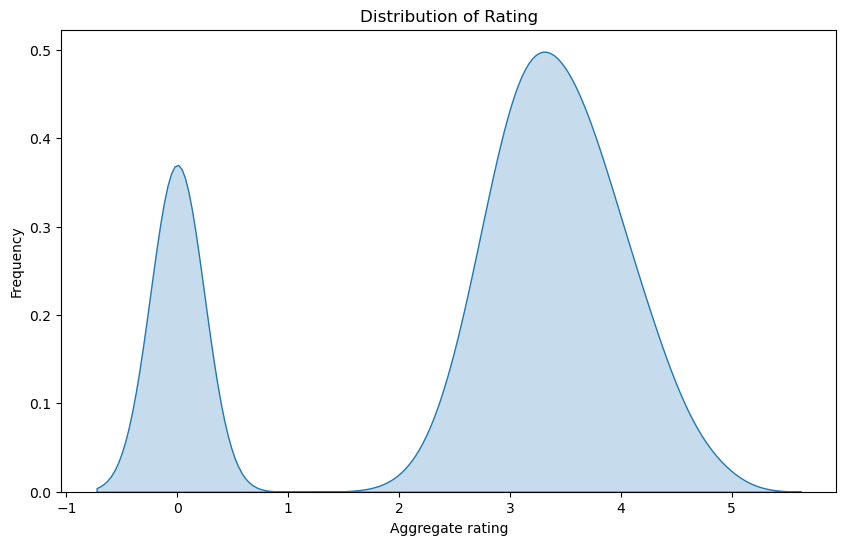

In [25]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.kdeplot(df['Aggregate rating'],shade=True)
plt.title("Distribution of Rating")
plt.xlabel("Aggregate rating")
plt.ylabel("Frequency")
plt.show()

In [26]:
# pd.set_option("display.max_rows",None)
# pd.set_option("display.max_columns",None)
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,Third Floor Century City Mall Kalayaan Avenue ...,Century City Mall Poblacion Makati City,Century City Mall Poblacion Makati City Makati...,121.027535,14.565443,French Japanese Desserts,...,Botswana PulaP,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,Little Tokyo 2277 Chino Roces Avenue Legaspi V...,Little Tokyo Legaspi Village Makati City,Little Tokyo Legaspi Village Makati City Makat...,121.014101,14.553708,Japanese,...,Botswana PulaP,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat Edsa ShangriLa,162,Mandaluyong City,Edsa ShangriLa 1 Garden Way Ortigas Mandaluyon...,Edsa ShangriLa Ortigas Mandaluyong City,Edsa ShangriLa Ortigas Mandaluyong City Mandal...,121.056831,14.581404,Seafood Asian Filipino Indian,...,Botswana PulaP,Yes,No,No,No,4,4.4,Green,Very Good,270


# Conclusion for Task 1
In the data exploration and preprocessing phase, I thoroughly examined the dataset, identifying the total number of rows and columns. I checked for missing values across all columns and addressed any deficiencies by filling missing categorical values with the mode. Upon further analysis, I concluded that there was no need for data type conversions as the existing formats were appropriate. Additionally, I analyzed the distribution of the target variable, "Aggregate rating," and found no evidence of class imbalances. This preliminary work has laid a solid foundation for subsequent modeling and analysis, ensuring data integrity and readiness for further exploration.








# TASK 2

Task: Descriptive Analysis
Calculate basic statistical measures (mean,
median, standard deviation, etc.) for numerical
columns.

Explore the distribution of categorical
variables like "Country Code", "City," and"Cuisines".

Identify the top cuisines and cities with the
highest number of restaurants.

In [27]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# Numeric_columns _stats

In [28]:
numeric_columns = df.select_dtypes(exclude='object')
summary_stats = numeric_columns.describe()
print(summary_stats)

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

# Exploration of distribution of categorical variables like "Country Code", "City," and"Cuisines".

# Univariate analysis

# Distribution of target variable

In [29]:
target_counts = df['Aggregate rating'].value_counts()
print("Distribution of target variable:")
print(target_counts)

Distribution of target variable:
Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


In [30]:
print(df['Restaurant Name'].value_counts())
print("--------------------------")
print(df['City'].value_counts())
print("------------------------- ")
print(df['Address'].value_counts())
print("------------------------- ")
print(df['Locality'].value_counts()) 
print("----------------------------")
print(df['Locality Verbose'].value_counts())
print("----------------------------")
print(df['Cuisines'].value_counts())
print("----------------------------")
print(df['Has Table booking'].value_counts())
print("----------------------------")
print(df['Has Online delivery'].value_counts())
print("----------------------------")
print(df['Is delivering now'].value_counts())
print("----------------------------")
print(df['Switch to order menu'].value_counts())
print("----------------------------")
print(df['Rating color'].value_counts())
print("----------------------------")
print(df['Rating text'].value_counts())



Restaurant Name
Cafe Coffee Day            83
Dominos Pizza              79
Subway                     63
Green Chick Chop           51
McDonalds                  48
                           ..
Johnny Rockets              1
House of Commons            1
HotMess                     1
Healthy Routes              1
Walters Coffee Roastery     1
Name: count, Length: 7431, dtype: int64
--------------------------
City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64
------------------------- 
Address
Sector 41 Noida                                                                    11
Dilli Haat INA New Delhi                                                           11
Greater Kailash GK 1 New Delhi                               

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [32]:
categorical_columns=df.select_dtypes(include='object')

In [33]:
categorical_columns

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
0,Le Petit Souffle,Makati City,Third Floor Century City Mall Kalayaan Avenue ...,Century City Mall Poblacion Makati City,Century City Mall Poblacion Makati City Makati...,French Japanese Desserts,Botswana PulaP,Yes,No,No,No,Dark Green,Excellent
1,Izakaya Kikufuji,Makati City,Little Tokyo 2277 Chino Roces Avenue Legaspi V...,Little Tokyo Legaspi Village Makati City,Little Tokyo Legaspi Village Makati City Makat...,Japanese,Botswana PulaP,Yes,No,No,No,Dark Green,Excellent
2,Heat Edsa ShangriLa,Mandaluyong City,Edsa ShangriLa 1 Garden Way Ortigas Mandaluyon...,Edsa ShangriLa Ortigas Mandaluyong City,Edsa ShangriLa Ortigas Mandaluyong City Mandal...,Seafood Asian Filipino Indian,Botswana PulaP,Yes,No,No,No,Green,Very Good
3,Ooma,Mandaluyong City,Third Floor Mega Fashion Hall SM Megamall Orti...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,Japanese Sushi,Botswana PulaP,No,No,No,No,Dark Green,Excellent
4,Sambo Kojin,Mandaluyong City,Third Floor Mega Atrium SM Megamall Ortigas Ma...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,Japanese Korean,Botswana PulaP,Yes,No,No,No,Dark Green,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,Naml۱ Gurme,stanbul,Kemanke Karamustafa Paa Mahallesi R۱ht۱m Cadde...,Karak_y,Karak_y stanbul,Turkish,Turkish LiraTL,No,No,No,No,Green,Very Good
9547,Ceviz Aac۱,stanbul,Kouyolu Mahallesi Muhittin st_nda Caddesi No 8...,Kouyolu,Kouyolu stanbul,World Cuisine Patisserie Cafe,Turkish LiraTL,No,No,No,No,Green,Very Good
9548,Huqqa,stanbul,Kuru_eme Mahallesi Muallim Naci Caddesi No 56 ...,Kuru_eme,Kuru_eme stanbul,Italian World Cuisine,Turkish LiraTL,No,No,No,No,Yellow,Good
9549,Ak Kahve,stanbul,Kuru_eme Mahallesi Muallim Naci Caddesi No 64B...,Kuru_eme,Kuru_eme stanbul,Restaurant Cafe,Turkish LiraTL,No,No,No,No,Green,Very Good


In [34]:
categorical_columns=df.select_dtypes(include='object')
categorical_columns.head()

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
0,Le Petit Souffle,Makati City,Third Floor Century City Mall Kalayaan Avenue ...,Century City Mall Poblacion Makati City,Century City Mall Poblacion Makati City Makati...,French Japanese Desserts,Botswana PulaP,Yes,No,No,No,Dark Green,Excellent
1,Izakaya Kikufuji,Makati City,Little Tokyo 2277 Chino Roces Avenue Legaspi V...,Little Tokyo Legaspi Village Makati City,Little Tokyo Legaspi Village Makati City Makat...,Japanese,Botswana PulaP,Yes,No,No,No,Dark Green,Excellent
2,Heat Edsa ShangriLa,Mandaluyong City,Edsa ShangriLa 1 Garden Way Ortigas Mandaluyon...,Edsa ShangriLa Ortigas Mandaluyong City,Edsa ShangriLa Ortigas Mandaluyong City Mandal...,Seafood Asian Filipino Indian,Botswana PulaP,Yes,No,No,No,Green,Very Good
3,Ooma,Mandaluyong City,Third Floor Mega Fashion Hall SM Megamall Orti...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,Japanese Sushi,Botswana PulaP,No,No,No,No,Dark Green,Excellent
4,Sambo Kojin,Mandaluyong City,Third Floor Mega Atrium SM Megamall Ortigas Ma...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,Japanese Korean,Botswana PulaP,Yes,No,No,No,Dark Green,Excellent


In [35]:
categorical_columns=df.select_dtypes(include='object').columns
categorical_columns

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')

In [36]:
df['Cuisines'].unique()

array(['French Japanese Desserts', 'Japanese',
       'Seafood Asian Filipino Indian', ..., 'Burger Izgara',
       'World Cuisine Patisserie Cafe', 'Italian World Cuisine'],
      dtype=object)

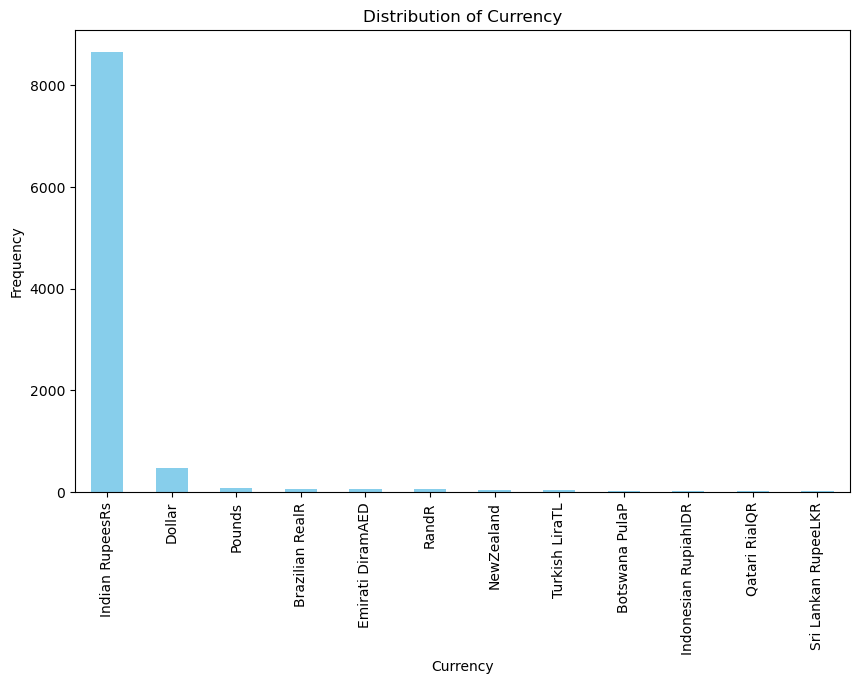

In [37]:

plt.figure(figsize=(10,6))
# plt.bar(x=df['Restaurant Name'].unique(),height=df['Restaurant Name'].value_counts())
df['Currency'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Currency")
plt.xlabel("Currency")
plt.ylabel("Frequency")
plt.show()

In [38]:
df['Has Table booking'].nunique(),df['Has Table booking'].unique()

(2, array(['Yes', 'No'], dtype=object))

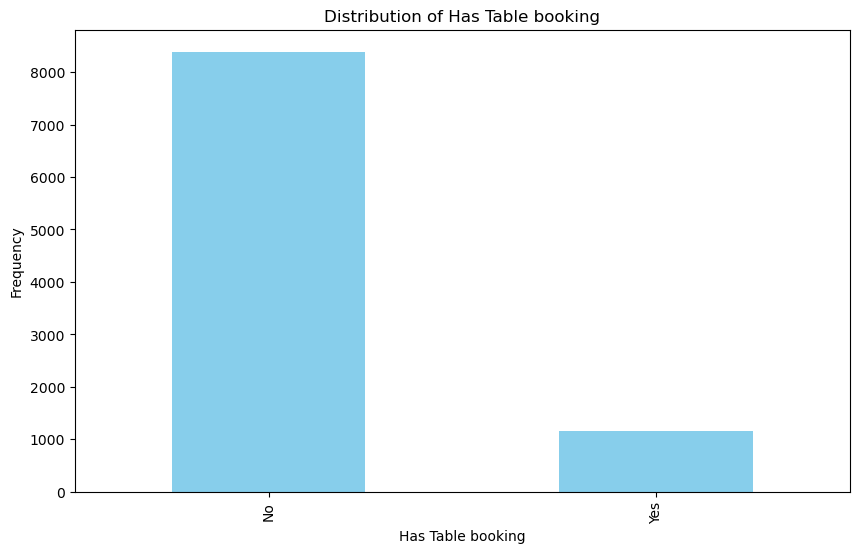

In [39]:

plt.figure(figsize=(10,6))
# plt.bar(x=df['Restaurant Name'].unique(),height=df['Restaurant Name'].value_counts())
df['Has Table booking'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Has Table booking")
plt.xlabel("Has Table booking")
plt.ylabel("Frequency")
plt.show()

In [40]:
df['Has Online delivery'].nunique(),df['Has Online delivery'].unique()

(2, array(['No', 'Yes'], dtype=object))

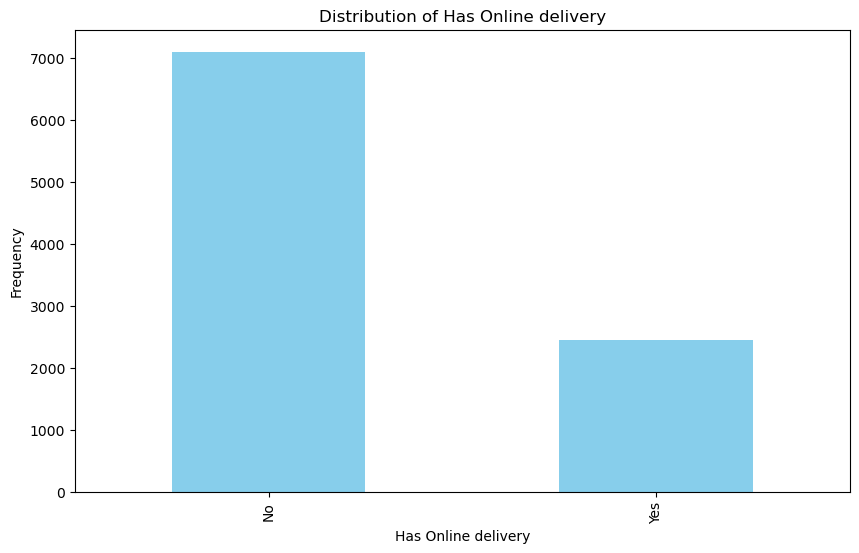

In [41]:

plt.figure(figsize=(10,6))
# plt.bar(x=df['Restaurant Name'].unique(),height=df['Restaurant Name'].value_counts())
df['Has Online delivery'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Has Online delivery")
plt.xlabel("Has Online delivery")
plt.ylabel("Frequency")
plt.show()

In [42]:
df['Is delivering now'].nunique(),df['Is delivering now'].unique()

(2, array(['No', 'Yes'], dtype=object))

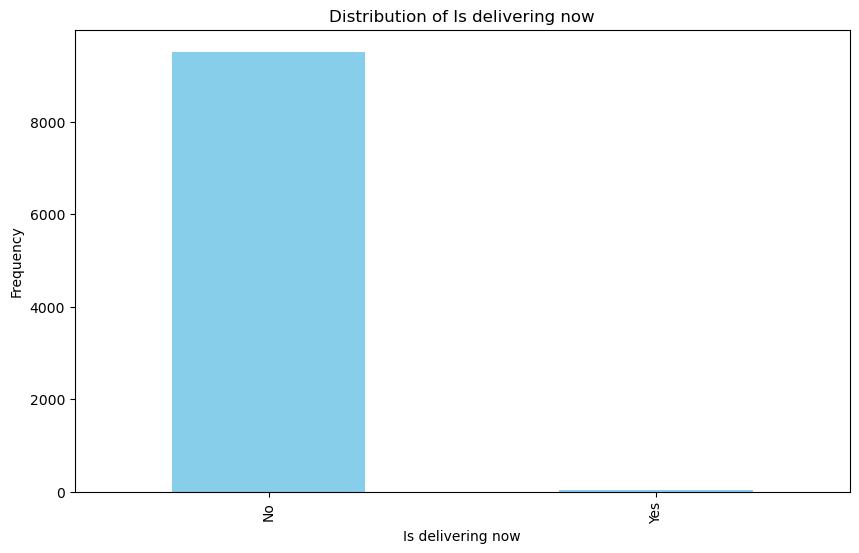

In [43]:

plt.figure(figsize=(10,6))
# plt.bar(x=df['Restaurant Name'].unique(),height=df['Restaurant Name'].value_counts())
df['Is delivering now'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Is delivering now")
plt.xlabel("Is delivering now")
plt.ylabel("Frequency")
plt.show()

In [44]:
df['Switch to order menu'].nunique(),df['Switch to order menu'].unique()

(1, array(['No'], dtype=object))

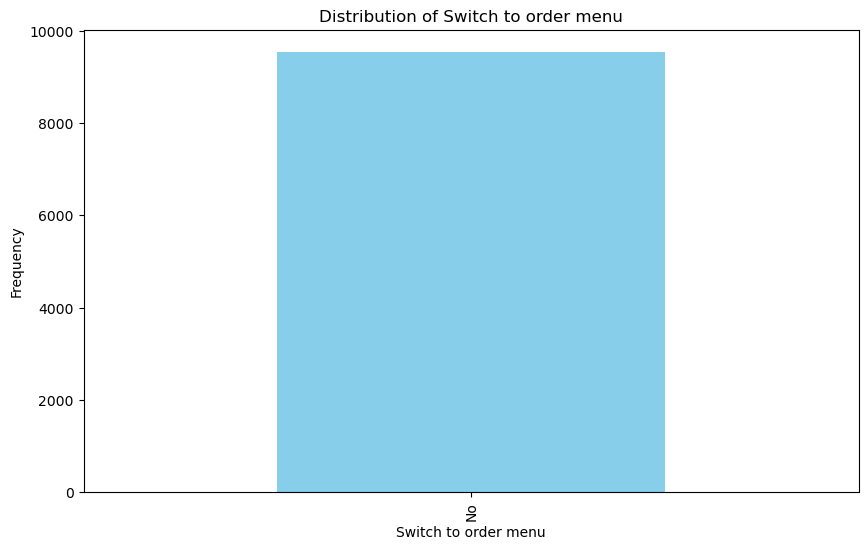

In [45]:

plt.figure(figsize=(10,6))
# plt.bar(x=df['Restaurant Name'].unique(),height=df['Restaurant Name'].value_counts())
df['Switch to order menu'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Switch to order menu")
plt.xlabel("Switch to order menu")
plt.ylabel("Frequency")
plt.show()

In [46]:
df['Rating color'].nunique(),df['Rating color'].unique()

(6,
 array(['Dark Green', 'Green', 'Yellow', 'Orange', 'White', 'Red'],
       dtype=object))

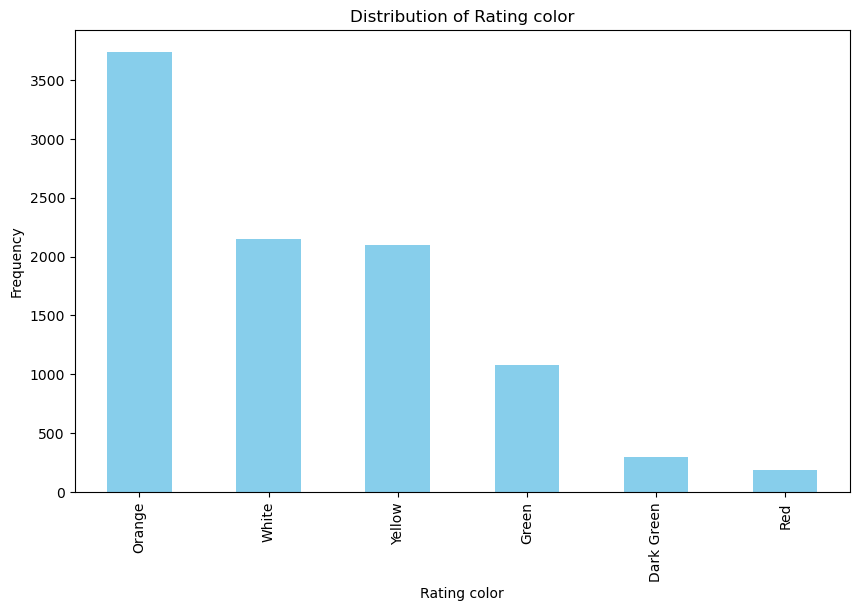

In [47]:
plt.figure(figsize=(10,6))
# plt.bar(x=df['Restaurant Name'].unique(),height=df['Restaurant Name'].value_counts())
df['Rating color'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Rating color")
plt.xlabel("Rating color")
plt.ylabel("Frequency")
plt.show()

In [48]:
df['Rating text'].nunique(),df['Rating text'].unique()

(6,
 array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
       dtype=object))

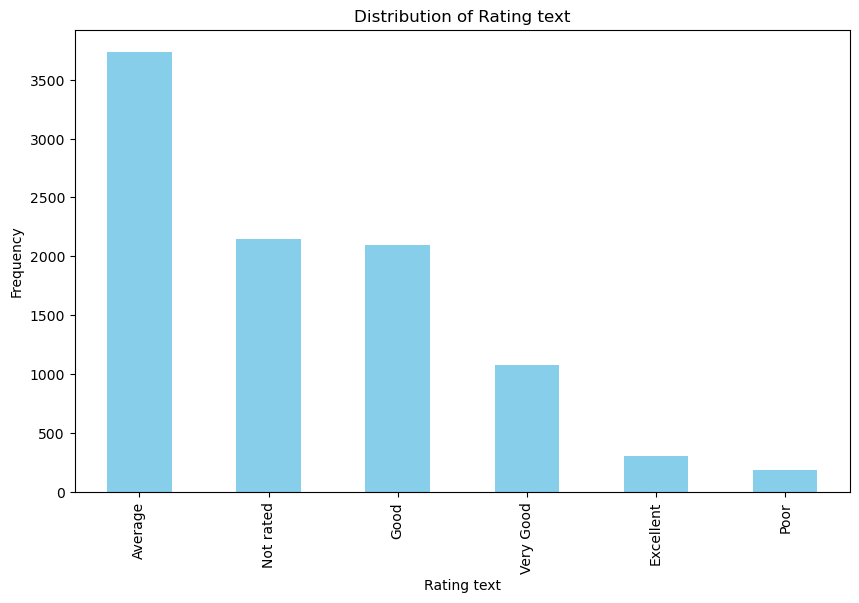

In [49]:
plt.figure(figsize=(10,6))
# plt.bar(x=df['Restaurant Name'].unique(),height=df['Restaurant Name'].value_counts())
df['Rating text'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Rating text")
plt.xlabel("Rating text")
plt.ylabel("Frequency")
plt.show()

# Bivariate analysis

In [50]:
# pd.set_option("display.max_rows",None)
# pd.set_option("display.max_columns",None)
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,Third Floor Century City Mall Kalayaan Avenue ...,Century City Mall Poblacion Makati City,Century City Mall Poblacion Makati City Makati...,121.027535,14.565443,French Japanese Desserts,...,Botswana PulaP,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,Little Tokyo 2277 Chino Roces Avenue Legaspi V...,Little Tokyo Legaspi Village Makati City,Little Tokyo Legaspi Village Makati City Makat...,121.014101,14.553708,Japanese,...,Botswana PulaP,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat Edsa ShangriLa,162,Mandaluyong City,Edsa ShangriLa 1 Garden Way Ortigas Mandaluyon...,Edsa ShangriLa Ortigas Mandaluyong City,Edsa ShangriLa Ortigas Mandaluyong City Mandal...,121.056831,14.581404,Seafood Asian Filipino Indian,...,Botswana PulaP,Yes,No,No,No,4,4.4,Green,Very Good,270


In [51]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [52]:
df['City'].nunique()

141

In [53]:
df['Country Code'].unique()


array([162,  30, 216,  14,  37, 184, 214,   1,  94, 148, 215, 166, 189,
       191, 208], dtype=int64)

In [54]:
df[df['Country Code']==216]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
82,17284404,Austins BBQ and Oyster Bar,216,Albany,2820 Meredyth Dr Albany GA 31707,Albany,Albany Albany,-84.221535,31.610387,BBQ Burger Seafood,...,Dollar,No,No,No,No,2,3.3,Orange,Average,35
83,17284203,BJs Country Buffet,216,Albany,2401 Dawson Rd Albany GA 31707,Albany,Albany Albany,-84.207095,31.608743,American BBQ,...,Dollar,No,No,No,No,1,3.3,Orange,Average,25
84,17284105,Cookie Shoppe,216,Albany,115 N Jackson St Albany GA 31701,Albany,Albany Albany,-84.154000,31.577200,North Indian,...,Dollar,No,No,No,No,1,3.4,Orange,Average,34
85,17284302,El Vaquero Mexican Restaurant,216,Albany,2700 Dawson Rd Albany GA 31707,Albany,Albany Albany,-84.219400,31.615800,Mexican,...,Dollar,No,No,No,No,1,3.4,Orange,Average,45
86,17284397,Elements Coffee Co Northwest,216,Albany,2726 Ledo Rd Ste 10 Albany GA 31707,Albany,Albany Albany,-84.206944,31.622412,Coffee and Tea Sandwich,...,Dollar,No,No,No,No,1,3.4,Orange,Average,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,17697389,The Screaming Eagle,216,Waterloo,228 E 4th St Waterloo IA 50703,Waterloo,Waterloo Waterloo,-92.335523,42.498400,American Bar Food,...,Dollar,No,No,No,No,1,3.7,Yellow,Good,101
559,17697424,The Thai Bowl,216,Waterloo,624 Sycamore Street Waterloo IA 50703,Waterloo,Waterloo Waterloo,-92.335769,42.497919,Thai,...,Dollar,No,No,No,No,1,3.5,Yellow,Good,58
560,17697332,Tokyo Japanese Steak House,216,Waterloo,1931 Sears Street Waterloo IA 50702,Waterloo,Waterloo Waterloo,-92.323400,42.465580,Japanese Steak Sushi,...,Dollar,No,No,No,No,2,3.9,Yellow,Good,156
561,17694056,Theo Yiannis Authentic Greek Restaurant,216,Weirton,322 American Way Weirton WV 26062,Weirton,Weirton Weirton,-80.529488,40.396043,Burger Greek Sandwich,...,Dollar,No,No,No,No,2,3.9,Yellow,Good,156


In [55]:
df[df['Country Code']==216].shape

(434, 21)

In [56]:
df[df['Country Code']==1].shape

(8652, 21)

In [57]:
df_max=pd.DataFrame(df.groupby('Has Table booking')['Aggregate rating'].value_counts())
df_max

count
Has Table booking Aggregate rating       
No                0.0                2101
                  3.1                 475
                  3.2                 463
                  3.4                 438
                  3.0                 428
...                                   ...
Yes               2.3                   3
                  2.0                   3
                  2.2                   2
                  1.8                   1
                  2.1                   1

[64 rows x 1 columns]

In [58]:
df_max=pd.DataFrame(df.groupby('Has Online delivery')['Aggregate rating'].value_counts())
df_max

count
Has Online delivery Aggregate rating       
No                  0.0                2052
                    3.1                 402
                    3.0                 399
                    3.2                 371
                    2.9                 329
...                                     ...
Yes                 2.0                   5
                    4.9                   4
                    1.8                   1
                    1.9                   1
                    4.8                   1

[65 rows x 1 columns]

In [59]:
df_max=pd.DataFrame(df.groupby('Is delivering now')['Aggregate rating'].value_counts())
df_max

count
Is delivering now Aggregate rating       
No                0.0                2147
                  3.2                 519
                  3.1                 518
                  3.4                 493
                  3.3                 482
                  3.5                 476
                  3.0                 466
                  3.6                 455
                  3.7                 426
                  3.8                 398
                  2.9                 380
                  3.9                 334
                  2.8                 314
                  4.1                 274
                  4.0                 266
                  2.7                 247
                  4.2                 221
                  2.6                 191
                  4.3                 174
                  4.4                 144
                  2.5                 107
                  4.5                  94
                  2.4                  86
                  4.6                  78
                  4.9                  61
                  2.3                  47
                  4.7                  42
                  2.2                  27
                  4.8                  25
                  2.1                  15
                  2.0                   7
                  1.9                   2
                  1.8                   1
Yes               3.4                   5
                  3.5                   4
                  2.7                   3
                  3.6                   3
                  3.2                   3
                  2.5                   3
                  3.8                   2
                  3.0                   2
                  3.7                   1
                  3.9                   1
                  0.0                   1
                  3.3                   1
                  3.1                   1
                  2.9                   1
                  2.8                   1
                  2.4                   1
                  4.5                   1

In [60]:
df['Average Cost for two'].unique()

array([  1100,   1200,   4000,   1500,   1000,   2000,   6000,    800,
          900,    700,    850,    600,   3000,   1800,     55,     30,
           45,     60,     50,     80,     90,    200,    150,    100,
          230,    240,    350,    140,    170,    120,    250,     40,
           70,    300,     85,     75,    400,     65,     25,     10,
            0,     20,     35,      7,    270,    500,    430,    315,
          220,     95,    190,    260,    180,    330,    280,    160,
          285,    130,    110,   2500,   3600,    550,   1400,    450,
          950,    650,   1300,   2400,   1600,   2200,    750,   1700,
         1250,   1900,   2700,   3500,   5000,   2300,   1750,   3200,
         2100,   1850,   4500,   3300,   1350,   1650,   1950,   1050,
          290,   1450,   2800,   3650,   4800,   1550,    720,   6500,
         7000,   1150,   2900,   2600,   4700,   3700,   3800,   4100,
         4300,   2650,   5100,   5500,   4400,   4200,   8000,   2350,
      

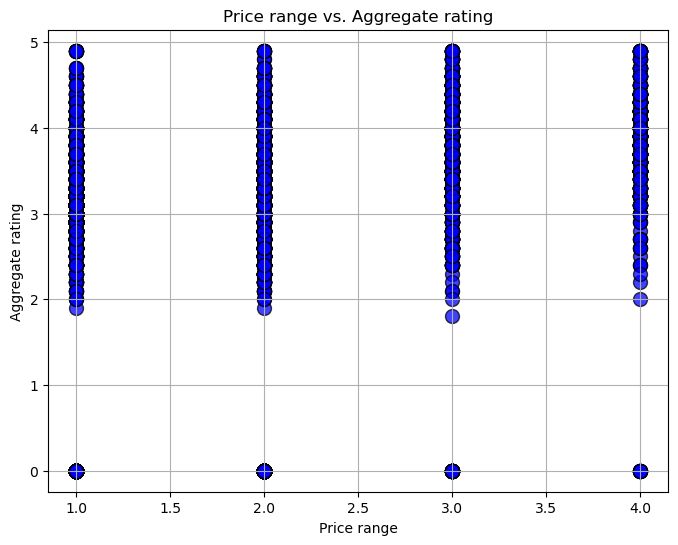

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Price range'], df['Aggregate rating'], c='blue', marker='o', edgecolors='black', s=100, alpha=0.75)
plt.title('Price range vs. Aggregate rating')
plt.xlabel('Price range')
plt.ylabel('Aggregate rating')
plt.grid(True)
plt.show()

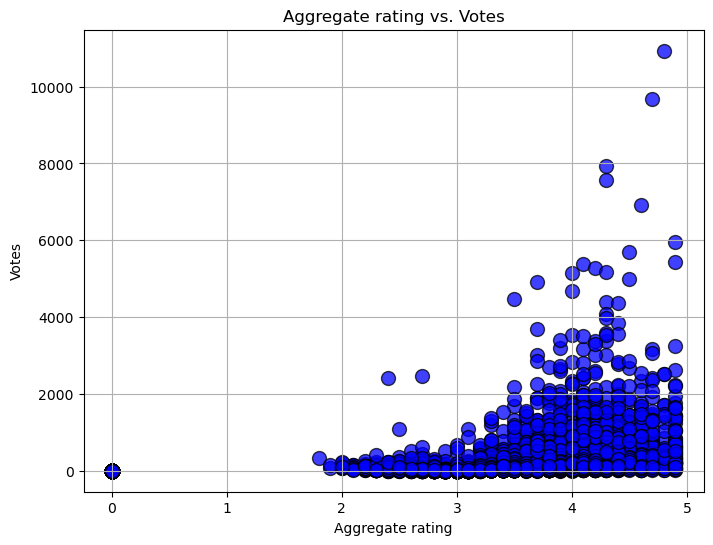

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Aggregate rating'], df['Votes'], c='blue', marker='o', edgecolors='black', s=100, alpha=0.75)
plt.title('Aggregate rating vs. Votes')
plt.xlabel('Aggregate rating')
plt.ylabel('Votes')
plt.grid(True)
plt.show()

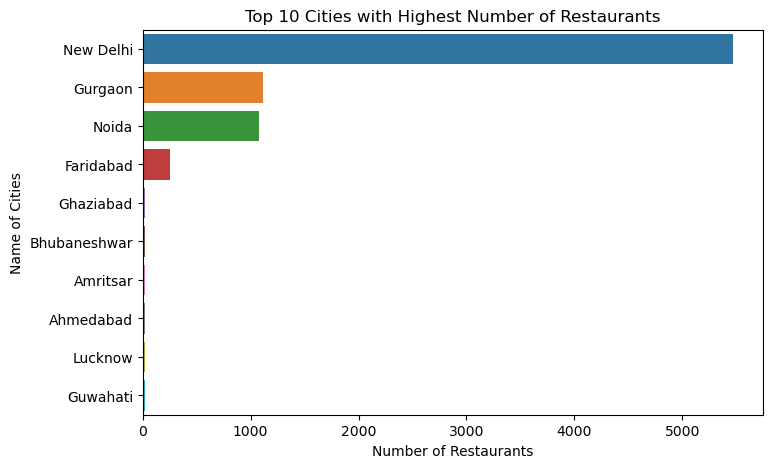

In [64]:
plt.figure(figsize=(8, 5))
sns.countplot(y = df['City'], order=df.City.value_counts().iloc[:10].index)
plt.xlabel('Number of Restaurants')
plt.ylabel('Name of Cities')
plt.title('Top 10 Cities with Highest Number of Restaurants')
plt.show()

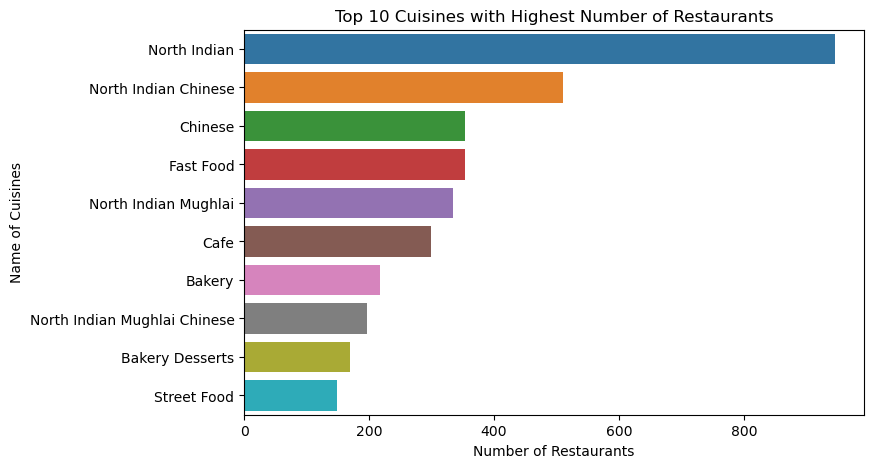

In [65]:
plt.figure(figsize=(8, 5))
sns.countplot(y = df['Cuisines'], order=df.Cuisines.value_counts().iloc[:10].index)
plt.xlabel('Number of Restaurants')
plt.ylabel('Name of Cuisines')
plt.title('Top 10 Cuisines with Highest Number of Restaurants')
plt.show()

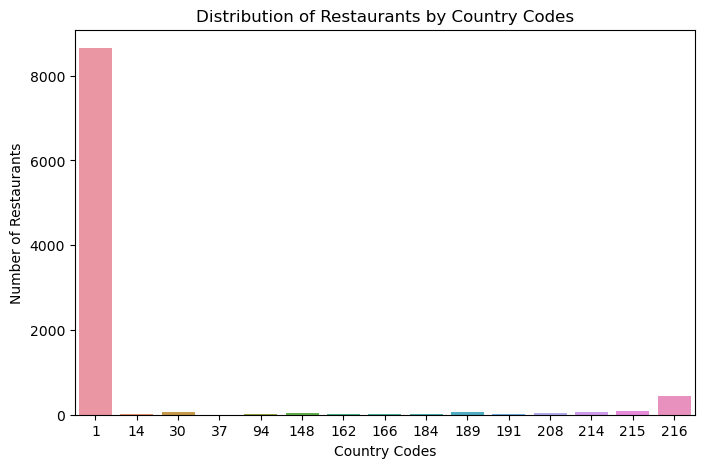

In [66]:
plt.figure(figsize=(8, 5))

# Create the figure object
sns.countplot(x = df['Country Code'])

# Set Labels
plt.xlabel('Country Codes')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurants by Country Codes')

# Display Chart
plt.show()

In [67]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,Third Floor Century City Mall Kalayaan Avenue ...,Century City Mall Poblacion Makati City,Century City Mall Poblacion Makati City Makati...,121.027535,14.565443,French Japanese Desserts,...,Botswana PulaP,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,Little Tokyo 2277 Chino Roces Avenue Legaspi V...,Little Tokyo Legaspi Village Makati City,Little Tokyo Legaspi Village Makati City Makat...,121.014101,14.553708,Japanese,...,Botswana PulaP,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat Edsa ShangriLa,162,Mandaluyong City,Edsa ShangriLa 1 Garden Way Ortigas Mandaluyon...,Edsa ShangriLa Ortigas Mandaluyong City,Edsa ShangriLa Ortigas Mandaluyong City Mandal...,121.056831,14.581404,Seafood Asian Filipino Indian,...,Botswana PulaP,Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,Third Floor Mega Fashion Hall SM Megamall Orti...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121.056475,14.585318,Japanese Sushi,...,Botswana PulaP,No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,Third Floor Mega Atrium SM Megamall Ortigas Ma...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121.057508,14.584450,Japanese Korean,...,Botswana PulaP,Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Identifing the top cuisines and cities with the highest number of restaurants.

In [68]:
top_cuisines = df['Cuisines'].value_counts().head(10)

# Display the results
print("Top 10 Cuisines with Highest Number of Restaurants:")
print(top_cuisines)

Top 10 Cuisines with Highest Number of Restaurants:
Cuisines
North Indian                    945
North Indian Chinese            511
Chinese                         354
Fast Food                       354
North Indian Mughlai            334
Cafe                            299
Bakery                          218
North Indian Mughlai Chinese    197
Bakery Desserts                 170
Street Food                     149
Name: count, dtype: int64


In [69]:
top_cities = df['City'].value_counts().head(10)

# Display the results
print("Top 10 Cities with Highest Number of Restaurants:")
print(top_cities)

Top 10 Cities with Highest Number of Restaurants:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


In [70]:
df.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
2817,851,Tamil Nadu House Canteen,1,New Delhi,Opposite Chanakya Theatre Chanakyapuri New Delhi,Chanakyapuri,Chanakyapuri New Delhi,77.190886,28.583066,South Indian Chettinad North Indian Chinese,...,Indian RupeesRs,No,No,No,No,2,3.4,Orange,Average,161
2650,310858,Penguin Bakers Shakers,1,New Delhi,G6 Pankaj Plaza Local Shopping Complex Surajma...,Anand Vihar,Anand Vihar New Delhi,77.306471,28.659677,Fast Food,...,Indian RupeesRs,No,No,No,No,1,2.8,Orange,Average,9
3477,18272344,LaDiDa,1,New Delhi,1st Floor D123 East of Kailash New Delhi,East of Kailash,East of Kailash New Delhi,77.246075,28.557350,Bakery Desserts,...,Indian RupeesRs,No,No,No,No,2,3.2,Orange,Average,14
664,113570,Turquoise Villa,1,Ahmedabad,Ground Floor Shanay 1 Near AMA IIM Road Vastr...,Vastrapur,Vastrapur Ahmedabad,72.543451,23.028514,Continental,...,Indian RupeesRs,No,No,No,No,3,4.0,Green,Very Good,535
212,17334355,Sierras Mexican Restaurant,216,Dalton,500 S 3rd Avenue Chatsworth GA 30705,Chatsworth,Chatsworth Dalton,-84.767911,34.752476,Mexican TexMex,...,Dollar,No,No,No,No,1,3.9,Yellow,Good,66


In [71]:
df1 = df.groupby(['Restaurant Name','Cuisines','City'],as_index = False).agg({'Aggregate rating':'min'})
df1

,Restaurant Name,Cuisines,City,Aggregate rating
0,10 Downing Street,North Indian Chinese,Bhopal,4.0
1,10 Downing Street,North Indian Chinese,Indore,4.0
2,10 To 10 In Delhi,Indian Cafe,Edinburgh,3.8
3,11th Avenue Cafe Bistro,Cafe American Italian Continental,Guwahati,4.1
4,12212,Fast Food,Nashik,3.5
...,...,...,...,...
8281,sketch Gallery,British Contemporary,London,4.5
8282,t Lounge by Dilmah,Cafe Tea Desserts,New Delhi,3.6
8283,tashas,Cafe Mediterranean,Cape Town,4.1
8284,ukuraa Sofras۱,Kebab Izgara,Ankara,4.4


In [72]:
df1 = df.groupby(['Restaurant Name','Cuisines','City'],as_index = False).agg({'Aggregate rating':'max'})

In [73]:
df1

,Restaurant Name,Cuisines,City,Aggregate rating
0,10 Downing Street,North Indian Chinese,Bhopal,4.0
1,10 Downing Street,North Indian Chinese,Indore,4.0
2,10 To 10 In Delhi,Indian Cafe,Edinburgh,3.8
3,11th Avenue Cafe Bistro,Cafe American Italian Continental,Guwahati,4.1
4,12212,Fast Food,Nashik,3.5
...,...,...,...,...
8281,sketch Gallery,British Contemporary,London,4.5
8282,t Lounge by Dilmah,Cafe Tea Desserts,New Delhi,3.6
8283,tashas,Cafe Mediterranean,Cape Town,4.1
8284,ukuraa Sofras۱,Kebab Izgara,Ankara,4.4


# Conclusion for Task 2
In this analysis, I computed fundamental statistical measures, including mean, median, and standard deviation, for numerical columns to gain insights into the dataset's distribution. I also explored categorical variables such as "Country Code," "City," and "Cuisines," which provided a deeper understanding of the dataset's structure. This exploration revealed the top cuisines and cities with the highest concentration of restaurants, highlighting key areas of culinary diversity and potential market opportunities. These findings enhance the overall comprehension of the dataset and inform future analytical efforts, including targeted marketing strategies and restaurant placement considerations.

# Task 3

Task: Geospatial Analysis

Visualize the locations of restaurants on a
map using latitude and longitude
information.



In [74]:
import folium

In [75]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,Third Floor Century City Mall Kalayaan Avenue ...,Century City Mall Poblacion Makati City,Century City Mall Poblacion Makati City Makati...,121.027535,14.565443,French Japanese Desserts,...,Botswana PulaP,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,Little Tokyo 2277 Chino Roces Avenue Legaspi V...,Little Tokyo Legaspi Village Makati City,Little Tokyo Legaspi Village Makati City Makat...,121.014101,14.553708,Japanese,...,Botswana PulaP,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat Edsa ShangriLa,162,Mandaluyong City,Edsa ShangriLa 1 Garden Way Ortigas Mandaluyon...,Edsa ShangriLa Ortigas Mandaluyong City,Edsa ShangriLa Ortigas Mandaluyong City Mandal...,121.056831,14.581404,Seafood Asian Filipino Indian,...,Botswana PulaP,Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,Third Floor Mega Fashion Hall SM Megamall Orti...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121.056475,14.585318,Japanese Sushi,...,Botswana PulaP,No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,Third Floor Mega Atrium SM Megamall Ortigas Ma...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121.057508,14.584450,Japanese Korean,...,Botswana PulaP,Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,stanbul,Kemanke Karamustafa Paa Mahallesi R۱ht۱m Cadde...,Karak_y,Karak_y stanbul,28.977392,41.022793,Turkish,...,Turkish LiraTL,No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aac۱,208,stanbul,Kouyolu Mahallesi Muhittin st_nda Caddesi No 8...,Kouyolu,Kouyolu stanbul,29.041297,41.009847,World Cuisine Patisserie Cafe,...,Turkish LiraTL,No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,stanbul,Kuru_eme Mahallesi Muallim Naci Caddesi No 56 ...,Kuru_eme,Kuru_eme stanbul,29.034640,41.055817,Italian World Cuisine,...,Turkish LiraTL,No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Ak Kahve,208,stanbul,Kuru_eme Mahallesi Muallim Naci Caddesi No 64B...,Kuru_eme,Kuru_eme stanbul,29.036019,41.057979,Restaurant Cafe,...,Turkish LiraTL,No,No,No,No,4,4.0,Green,Very Good,901


In [76]:
!pip install shapely
! pip install geopandas

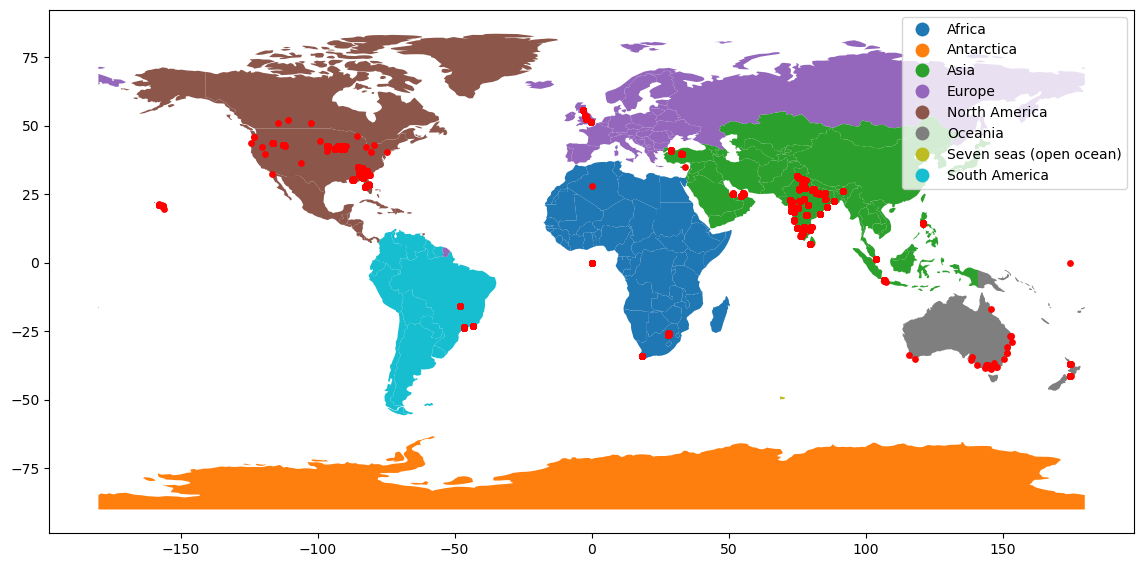

In [77]:
# Locations of restaurants on a map using latitude and longitude information
# Import the necessary libraries
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

# Create Point geometry from latitude and longitude using Shapely
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.Longitude, df.Latitude)
)

# Create a base map of the world using Geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a map that fits the screen and plots the restaurant locations
# The "continent" column is used for coloring and a legend is di splayed
gdf.plot(ax=world.plot("continent", legend = True, figsize=(14, 12)), marker='o', color='red', markersize=15)

# Show the map
plt.show()

Analyze the distribution of restaurants
across different cities or countries.


In [78]:
df_max=pd.DataFrame(df.groupby('Restaurant Name')['City'].value_counts())
df_max

count
Restaurant Name         City                  
10 Downing Street       Bhopal               1
                        Indore               1
10 To 10 In Delhi       Edinburgh            1
11th Avenue Cafe Bistro Guwahati             1
12212                   Nashik               1
...                                        ...
sketch Gallery          London               1
t Lounge by Dilmah      New Delhi            1
tashas                  Cape Town            1
ukuraa Sofras۱          Ankara               1
wagamama                Wellington City      1

[7964 rows x 1 columns]

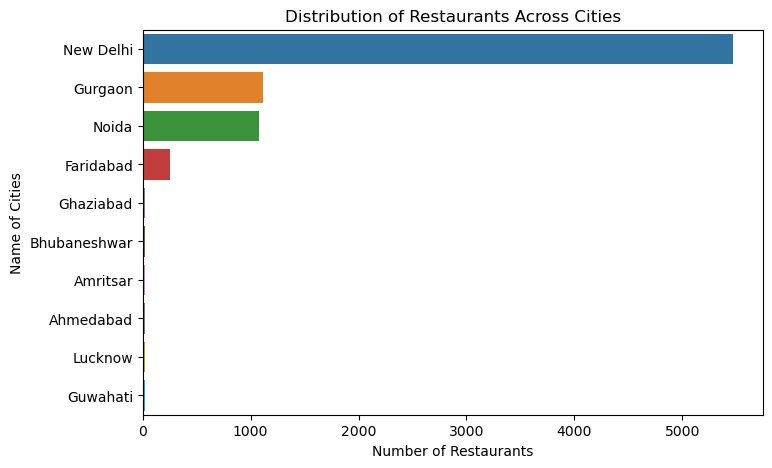

In [79]:
plt.figure(figsize=(8, 5))

# Create the figure object
# There are many cities names present in the data, so i select only the top 10 cities
sns.countplot(y = df['City'], order=df.City.value_counts().iloc[:10].index)

# Set Labels
plt.xlabel('Number of Restaurants')
plt.ylabel('Name of Cities')
plt.title('Distribution of Restaurants Across Cities')

# Display Chart
plt.show()

Determine if there is any correlation
between the restaurant's location and its
rating.

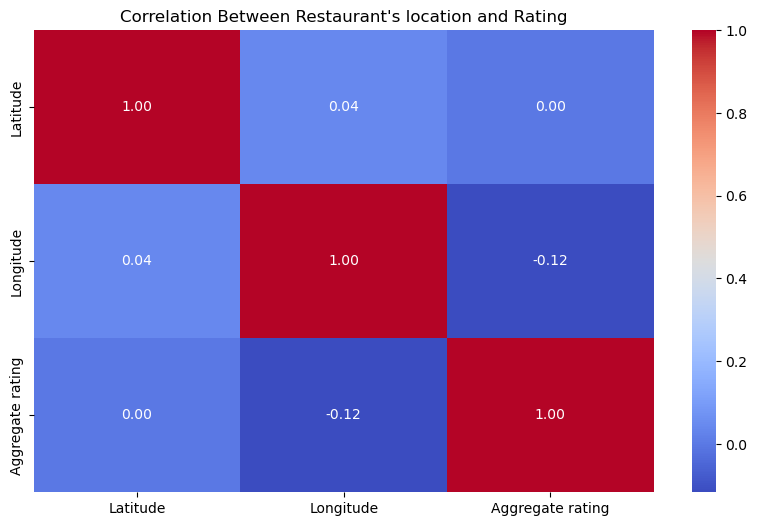

In [80]:
plt.figure(figsize=(10, 6))

# Calculate the correlation between latitude, longitude, and ratings
correlation_matrix = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()

# Create a heatmap to visualize the correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set Title
plt.title("Correlation Between Restaurant's location and Rating")

# Display Chart
plt.show()

Conclusion
The insights which i found from the overall level 1 project:

Data Overview:

The dataset includes restaurant details across various cities with 9,551 rows and 21 columns.
Minimal null values (9) were found only in the 'Cuisines' column.
No duplicates exist, and data type conversion wasn't needed.
The 'Aggregate rating' distribution is well-balanced.
Descriptive Insights:

Key statistical measures for numerical columns were identified.
Country codes 1 and 216 have the most restaurants.
New Delhi, Gurgaon, and Noida are top cities with the highest restaurant counts.
North Indian and Chinese cuisines are most popular.
Geospatial Analysis:

North America and Asia (mainly India) have the most number of restaurants.
New Delhi leads in the number of restaurants, followed by Gurgaon, Noida, and Faridabad.
Latitude and rating show no correlation, while longitude and rating are negatively correlated.
These insights offer a comprehensive analysis of the restaurant dataset reveals key data characteristics, descriptive insights, and geospatial patterns, informs further analysis.

# Level 2

Task: Table Booking and Online Delivery

Task 1
Determine the percentage of restaurants that
offer table booking and online delivery.

In [81]:
total_restaurants = len(df)
table_booking_percentage = (df['Has Table booking'] == 'Yes').sum() / total_restaurants * 100
online_delivery_percentage = (df['Has Online delivery'] == 'Yes').sum() / total_restaurants * 100

# Display results
print(f"Percentage of restaurants offering Table Booking: {table_booking_percentage:.2f}%")
print(f"Percentage of restaurants offering Online Delivery: {online_delivery_percentage:.2f}%")

Percentage of restaurants offering Table Booking: 12.12%
Percentage of restaurants offering Online Delivery: 25.66%


Compare the average ratings of restaurants
with table booking and those without.

In [82]:
avg_rating_with_table = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
print(f"Average rating with Table Booking: {avg_rating_with_table:.2f}")

Average rating with Table Booking: 3.44


In [83]:
avg_rating_without_table = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()
print(f"Average rating without Table Booking: {avg_rating_without_table:.2f}")

Average rating without Table Booking: 2.56


Analyze the availability of online delivery
among restaurants with different price ranges.

In [84]:
price_ranges = df['Average Cost for two'].apply(lambda x: 'Low' if x < 500 else 'Medium' if 500 <= x <= 1000 else 'High')
online_delivery_by_price_range = df.groupby(price_ranges)['Has Online delivery'].value_counts(normalize=True).unstack()
print("Online Delivery Availability by Price Range:")
print(online_delivery_by_price_range)

Online Delivery Availability by Price Range:
Has Online delivery         No       Yes
Average Cost for two                    
High                  0.719149  0.280851
Low                   0.858523  0.141477
Medium                0.566209  0.433791


Task 2
Determine the most common price range
among all the restaurants.

In [85]:
df['Price range'].unique()

array([3, 4, 2, 1], dtype=int64)

In [86]:
most_common_price_range = df['Price range'].mode()[0]
print(f"Most Common Price Range: {most_common_price_range}")

Most Common Price Range: 1


Calculate the average rating for each price
range.

In [87]:
avg_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()
print("Average rating for each price range:")
print(avg_rating_by_price_range,3)

Average rating for each price range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64 3


Identify the color that represents the highest
average rating among different price ranges.

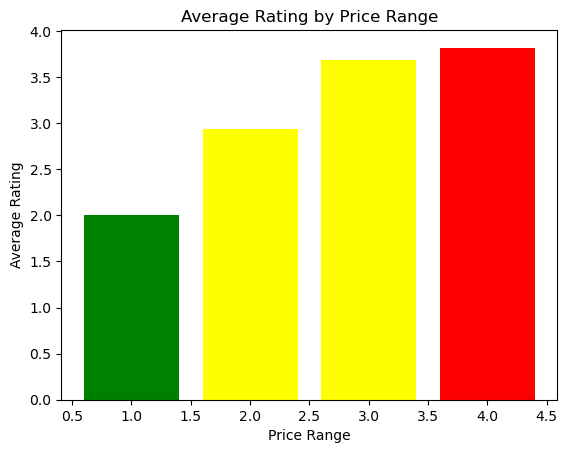

In [88]:
highest_avg_rating_color = avg_rating_by_price_range.idxmax()
plt.bar(avg_rating_by_price_range.index, avg_rating_by_price_range, color=['green','yellow','yellow'])
plt.bar(highest_avg_rating_color, avg_rating_by_price_range[highest_avg_rating_color], color=['red','yellow'])
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Average Rating by Price Range')
plt.show()

Task 3  Task: Feature Engineering


Extract additional features from the existing
columns, such as the length of the restaurant
name or address.

In [89]:
df['Address'].head()

0    Third Floor Century City Mall Kalayaan Avenue ...
1    Little Tokyo 2277 Chino Roces Avenue Legaspi V...
2    Edsa ShangriLa 1 Garden Way Ortigas Mandaluyon...
3    Third Floor Mega Fashion Hall SM Megamall Orti...
4    Third Floor Mega Atrium SM Megamall Ortigas Ma...
Name: Address, dtype: object

In [90]:
df['Restaurant Name'].head()

0        Le Petit Souffle
1        Izakaya Kikufuji
2    Heat  Edsa ShangriLa
3                    Ooma
4             Sambo Kojin
Name: Restaurant Name, dtype: object

In [91]:
df['length of restaurant name'] = df['Restaurant Name'].apply(len)
df['Address Length'] = df['Address'].apply(len)

In [92]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,length of restaurant name,Address Length
0,6317637,Le Petit Souffle,162,Makati City,Third Floor Century City Mall Kalayaan Avenue ...,Century City Mall Poblacion Makati City,Century City Mall Poblacion Makati City Makati...,121.027535,14.565443,French Japanese Desserts,...,No,No,No,3,4.8,Dark Green,Excellent,314,16,67
1,6304287,Izakaya Kikufuji,162,Makati City,Little Tokyo 2277 Chino Roces Avenue Legaspi V...,Little Tokyo Legaspi Village Makati City,Little Tokyo Legaspi Village Makati City Makat...,121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,16,64
2,6300002,Heat Edsa ShangriLa,162,Mandaluyong City,Edsa ShangriLa 1 Garden Way Ortigas Mandaluyon...,Edsa ShangriLa Ortigas Mandaluyong City,Edsa ShangriLa Ortigas Mandaluyong City Mandal...,121.056831,14.581404,Seafood Asian Filipino Indian,...,No,No,No,4,4.4,Green,Very Good,270,20,52
3,6318506,Ooma,162,Mandaluyong City,Third Floor Mega Fashion Hall SM Megamall Orti...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121.056475,14.585318,Japanese Sushi,...,No,No,No,4,4.9,Dark Green,Excellent,365,4,66
4,6314302,Sambo Kojin,162,Mandaluyong City,Third Floor Mega Atrium SM Megamall Ortigas Ma...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121.057508,14.584450,Japanese Korean,...,No,No,No,4,4.8,Dark Green,Excellent,229,11,60


Create new features like "Has Table Booking"
or "Has Online Delivery" by encoding
categorical variables.

In [93]:
df['Has Table Booking'] = df['Has Table booking'].map({"Yes":1,"No":0})
df['Has Online Delivery'] = df['Has Online delivery'].map({"Yes":1,"No":0})

In [94]:
df.shape

(9551, 25)

# Level 3

Build a regression model to predict the
aggregate rating of a restaurant based on
available features.
Split the dataset into training and testing sets
and evaluate the model's performance using
appropriate metrics.

Experiment with different algorithms (e.g.,
linear regression, decision trees, random
forest) and compare their performance.

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [96]:
df3=pd.read_csv(r"H:\Sandeep\DATA SCIENCE\INTERNSHIP_Cognifyz\Dataset .csv")
df3

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [97]:
df3['Cuisines'].fillna(df3['Cuisines'].mode()[0],inplace=True)


In [98]:
def remove_special_characters(text):
    text = str(text)
    return re.sub(r'[^\w\s]', '', text)
for col in categorical_columns:
    df3[col] = df3[col].apply(remove_special_characters)

In [99]:
df3['Has Table Booking'] = df3['Has Table booking'].map({"Yes":1,"No":0})
df3['Has Online Delivery'] = df3['Has Online delivery'].map({"Yes":1,"No":0})

In [100]:
df3.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Has Table Booking,Has Online Delivery
0,6317637,Le Petit Souffle,162,Makati City,Third Floor Century City Mall Kalayaan Avenue ...,Century City Mall Poblacion Makati City,Century City Mall Poblacion Makati City Makati...,121.027535,14.565443,French Japanese Desserts,...,No,No,No,3,4.8,Dark Green,Excellent,314,1,0
1,6304287,Izakaya Kikufuji,162,Makati City,Little Tokyo 2277 Chino Roces Avenue Legaspi V...,Little Tokyo Legaspi Village Makati City,Little Tokyo Legaspi Village Makati City Makat...,121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,1,0
2,6300002,Heat Edsa ShangriLa,162,Mandaluyong City,Edsa ShangriLa 1 Garden Way Ortigas Mandaluyon...,Edsa ShangriLa Ortigas Mandaluyong City,Edsa ShangriLa Ortigas Mandaluyong City Mandal...,121.056831,14.581404,Seafood Asian Filipino Indian,...,No,No,No,4,4.4,Green,Very Good,270,1,0
3,6318506,Ooma,162,Mandaluyong City,Third Floor Mega Fashion Hall SM Megamall Orti...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121.056475,14.585318,Japanese Sushi,...,No,No,No,4,4.9,Dark Green,Excellent,365,0,0
4,6314302,Sambo Kojin,162,Mandaluyong City,Third Floor Mega Atrium SM Megamall Ortigas Ma...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121.057508,14.584450,Japanese Korean,...,No,No,No,4,4.8,Dark Green,Excellent,229,1,0


In [101]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [102]:
features = ['Average Cost for two', 'Votes', 'Price range', 'Has Table Booking', 'Has Online Delivery']
target = 'Aggregate rating'

X = df[features]
y = df[target]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [104]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}


In [105]:
models.items()

dict_items([('Linear Regression', LinearRegression()), ('Decision Tree', DecisionTreeRegressor()), ('Random Forest', RandomForestRegressor())])

In [106]:
for model_name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE) to evaluate model accuracy
    mse = mean_squared_error(y_test, y_pred)

    # Calculate R-squared (R2) to assess the goodness of fit
    r2 = r2_score(y_test, y_pred)

    # Print model performance metrics
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("----------------------------------")

Model: Linear Regression
Mean Squared Error: 1.7139488707060402
R-squared: 0.2785912417562457
----------------------------------
Model: Decision Tree
Mean Squared Error: 0.21050791099781518
R-squared: 0.9113962771766565
----------------------------------
Model: Random Forest
Mean Squared Error: 0.14312609382574734
R-squared: 0.9397575858977766
----------------------------------


# Task 2
Task: Customer Preference Analysis

Analyze the relationship between the type of
cuisine and the restaurant's rating.

Identify the most popular cuisines among
customers based on the number of votes.

Determine if there are any specific cuisines
that tend to receive higher ratings.

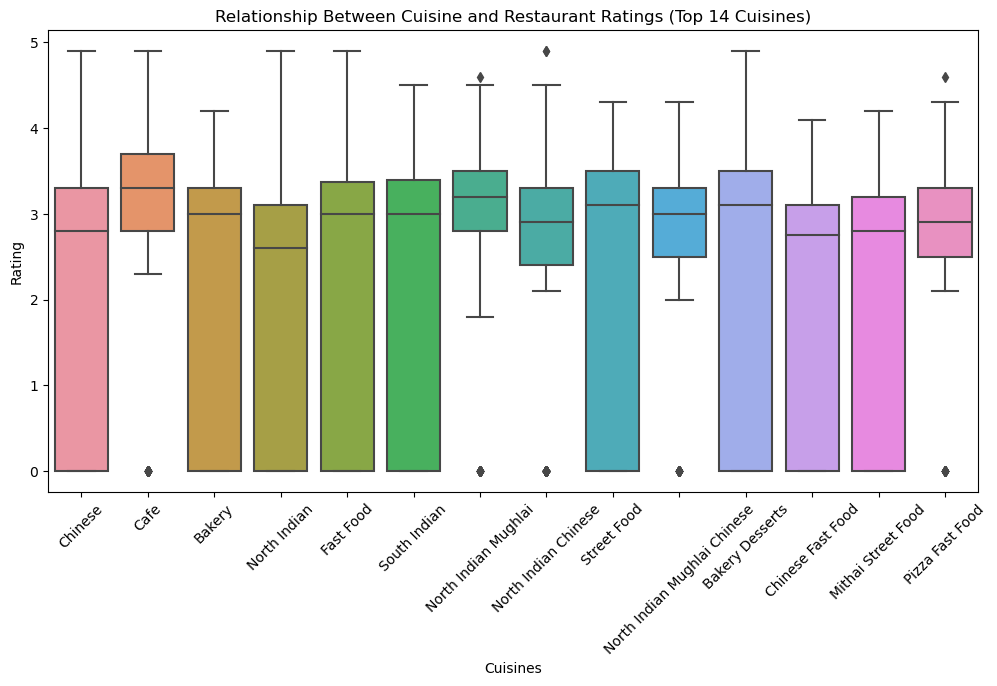

In [107]:
top_n = 14
top_cuisines = df3['Cuisines'].value_counts().nlargest(top_n).index

# Filter the dataset to include only the top 15 cuisines
df_filtered = df3[df3['Cuisines'].isin(top_cuisines)]

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='Cuisines', y='Aggregate rating')

# Set labels
plt.title(f'Relationship Between Cuisine and Restaurant Ratings (Top {top_n} Cuisines)')
plt.xlabel('Cuisines')
plt.ylabel('Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display Chart
plt.show()

In [108]:
top_cuisines = df3.groupby('Cuisines')['Votes'].sum().nlargest(15)

print("Top Cuisines by Number of Votes:")
print(top_cuisines)

Top Cuisines by Number of Votes:
Cuisines
North Indian Mughlai                       53747
North Indian                               48967
North Indian Chinese                       42012
Cafe                                       30657
Chinese                                    21925
North Indian Mughlai Chinese               20115
Fast Food                                  17852
South Indian                               16433
Mughlai North Indian                       15275
Italian                                    14799
European Mediterranean North Indian        12541
Modern Indian                              12355
Chinese Thai                               12354
Pizza                                      11537
Continental American Asian North Indian    11404
Name: Votes, dtype: int64


In [109]:
cuisine_ratings = df3.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)
cuisine_ratings.head(25)

,Cuisines,Aggregate rating
1062,Italian Deli,4.90
949,Hawaiian Seafood,4.90
93,American Sandwich Tea,4.90
683,Continental Indian,4.90
796,European Asian Indian,4.90
803,European Contemporary,4.90
808,European German,4.90
169,BBQ Breakfast Southern,4.90
41,American Coffee and Tea,4.90
1779,Sunda Indonesian,4.90


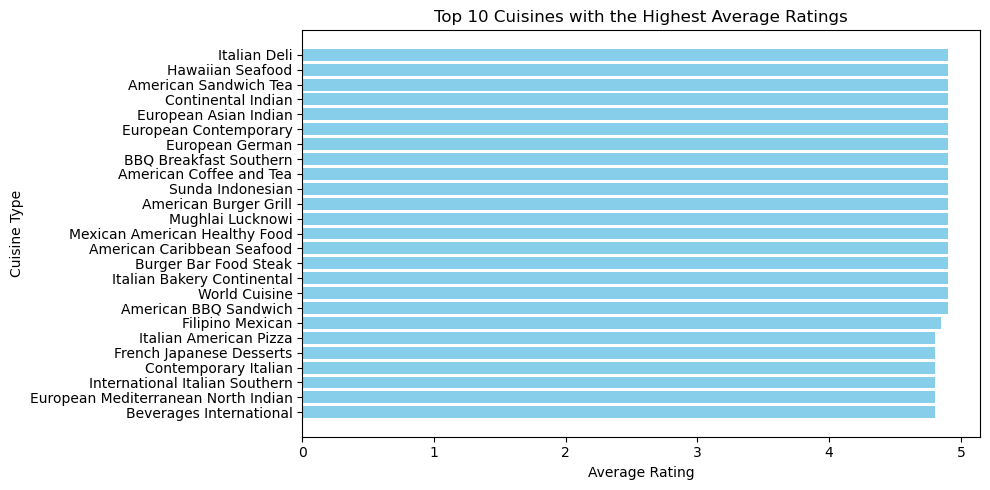

In [110]:
cuisine_ratings = df3.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)
plt.figure(figsize=(10, 5))
plt.barh(cuisine_ratings['Cuisines'][:25], cuisine_ratings['Aggregate rating'][:25], color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.title('Top 10 Cuisines with the Highest Average Ratings')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

# Task 3

Task: Data Visualization

Create visualizations to represent the distribution
of ratings using different charts (histogram, bar
plot, etc.).

Compare the average ratings of different cuisines
or cities using appropriate visualizations.

Visualize the relationship between various
features and the target variable to gain insights.

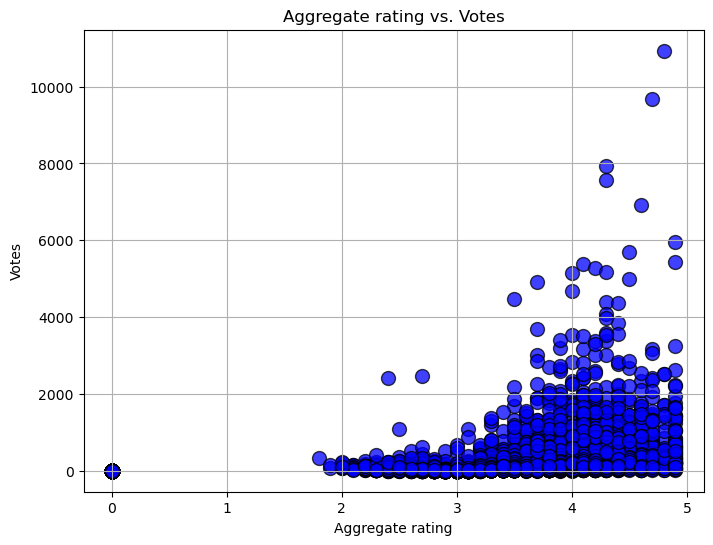

In [111]:
plt.figure(figsize=(8, 6))
plt.scatter(df3['Aggregate rating'], df3['Votes'], c='blue', marker='o', edgecolors='black', s=100, alpha=0.75)
plt.title('Aggregate rating vs. Votes')
plt.xlabel('Aggregate rating')
plt.ylabel('Votes')
plt.grid(True)
plt.show()

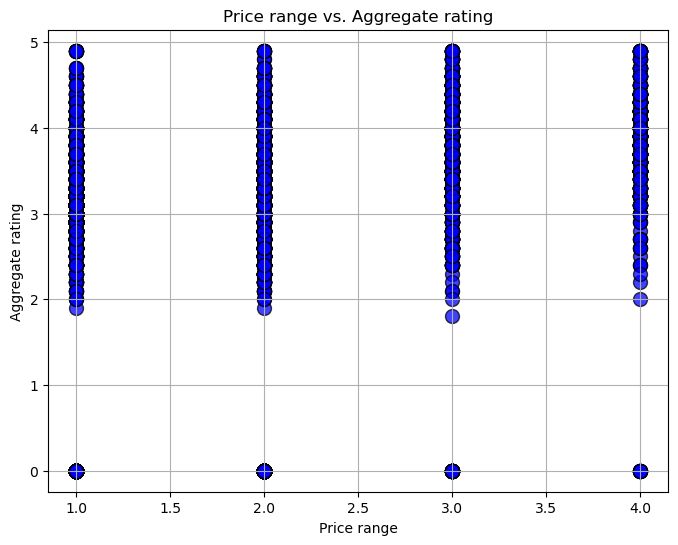

In [112]:
plt.figure(figsize=(8, 6))
plt.scatter(df3['Price range'], df3['Aggregate rating'], c='blue', marker='o', edgecolors='black', s=100, alpha=0.75)
plt.title('Price range vs. Aggregate rating')
plt.xlabel('Price range')
plt.ylabel('Aggregate rating')
plt.grid(True)
plt.show()

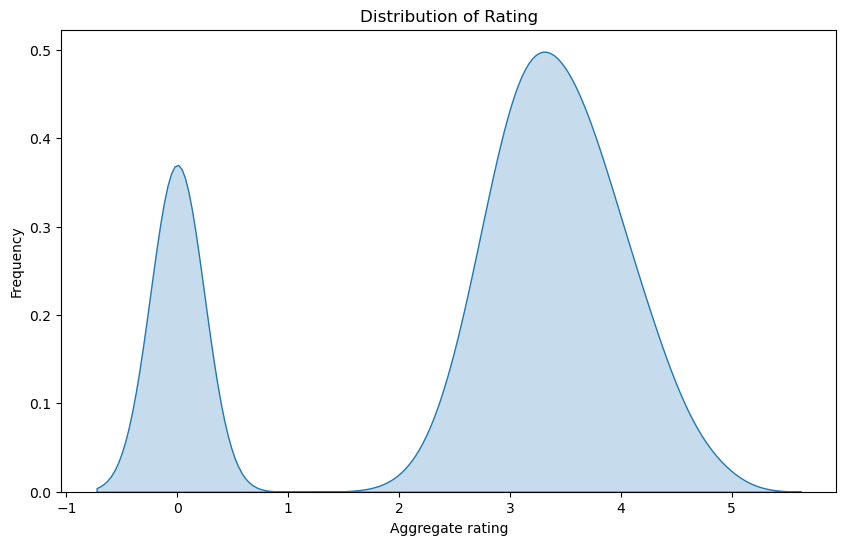

In [113]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.kdeplot(df3['Aggregate rating'],shade=True)
plt.title("Distribution of Rating")
plt.xlabel("Aggregate rating")
plt.ylabel("Frequency")
plt.show()

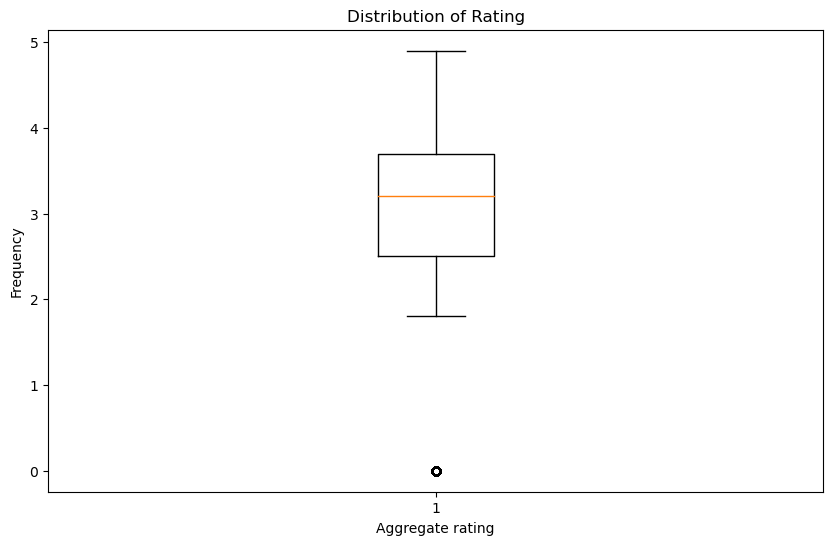

In [114]:
plt.figure(figsize=(10,6))
plt.boxplot(df3['Aggregate rating'])
plt.title("Distribution of Rating")
plt.xlabel("Aggregate rating")
plt.ylabel("Frequency")
plt.show()

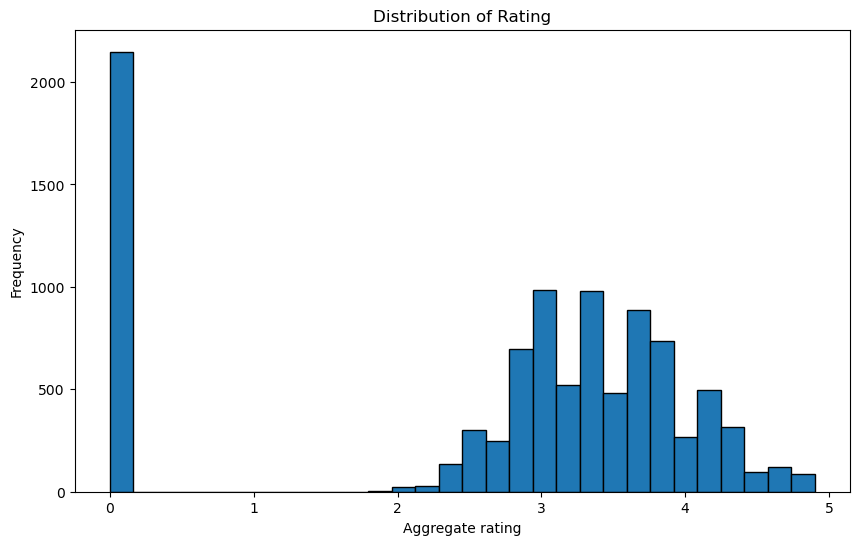

In [115]:
plt.figure(figsize=(10,6))
plt.hist(df3['Aggregate rating'],bins=30,edgecolor="k")
plt.title("Distribution of Rating")
plt.xlabel("Aggregate rating")
plt.ylabel("Frequency")
plt.show()

Relationship Between Various Features and the Target Variable.

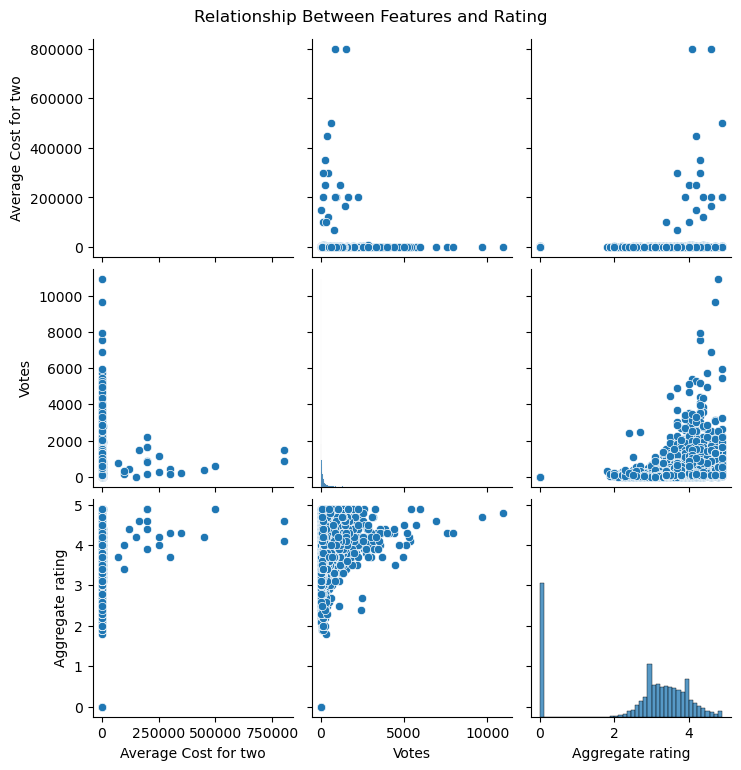

In [116]:
sns.pairplot(data=df3, vars=['Average Cost for two', 'Votes', 'Aggregate rating'])
plt.suptitle("Relationship Between Features and Rating", y=1.02)
plt.show()

Compare the average ratings of different cuisines
or cities using appropriate visualizations.

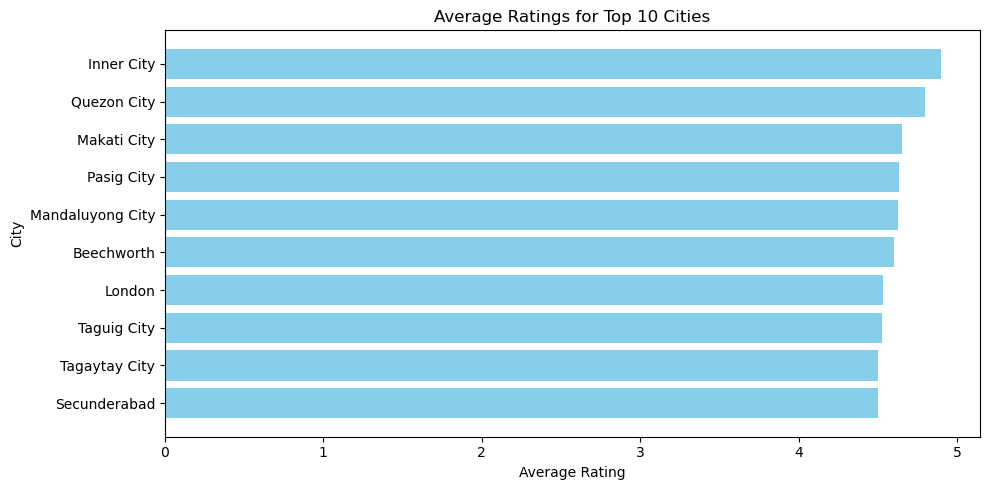

In [117]:
city_ratings = df3.groupby('City')['Aggregate rating'].mean().reset_index()
city_ratings = city_ratings.sort_values(by='Aggregate rating', ascending=False)
plt.figure(figsize=(10, 5))
plt.barh(city_ratings['City'][:10], city_ratings['Aggregate rating'][:10], color='skyblue')
plt.ylabel('City')
plt.xlabel('Average Rating')
plt.title(f'Average Ratings for Top 10 Cities')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()


Conclusion
The insights which i found from the overall level 3 project:

Predictive Modeling Insights:

Leveraging three regression models, Linear Regression, Decision Tree, and Random Forest, we successfully predicted restaurant aggregate ratings.
Random Forest outperformed other models, showcasing the lowest Mean Squared Error (MSE) of approximately 0.1337 and the highest R-squared value of about 0.9413.
Customer Preference Analysis Findings:

Certain cuisines like cafe, mughlai, north Indian, and fast food significantly impact restaurant ratings, with varying performance.
North Indian and Chinese cuisines exhibit greater rating variability, while cafe and fast food cuisines maintain more consistent ratings.
By the number of votes, North Indian, Mughlai, and Chinese cuisines emerged as the most popular.
Italian, Hawaiian, Seafood, Tea, Sandwich, Continental, and Indian cuisines received the highest average ratings.
Data Visualization Highlights:

The restaurant ratings distribution is negatively skewed.
Italian, Hawaiian, Seafood, Tea, Sandwich, Continental, and Indian cuisines topped the charts based on the highest average ratings.
Cities like Inner City, Quezon City, and Makati City were identified as the most popular based on the highest average rating.
We observed a positive correlation between votes and restaurant ratings.